In [1]:
# go to upper directory
import sys
sys.path.append('../')

In [2]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

import models
import dataset
import config

/home/admin/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-08-24 08:44:39.316744: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-24 08:44:39.360296: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-24 08:44:40.021334: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorR

In [3]:
vae = models.VAE()

In [4]:
dataloader = dataset.get_dataloader(batch_size=1, shuffle=False, num_workers=0)
spectrogram, caption = next(iter(dataloader))
spectrogram, caption = next(iter(dataloader))
spectrogram = spectrogram.to(config.DEVICE)

In [5]:
embeddings = vae.encode(spectrogram)
embeddings = embeddings.latent_dist.mode()

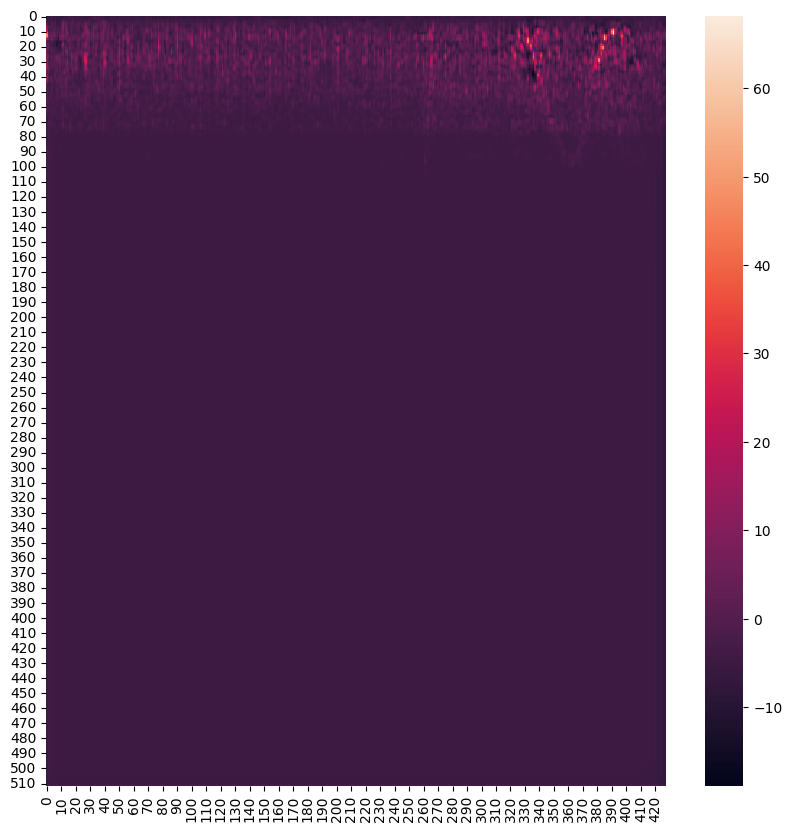

In [7]:
# create a sample from the embeddings
sample = vae.decode(embeddings)
sample = sample.sample
# print the spectrogram
plt.figure(figsize=(10, 10))
sns.heatmap(sample.squeeze().cpu().detach().numpy())
plt.show()

In [8]:
# print minimum and maximum values
print(f"min: {torch.min(sample)}")
print(f"max: {torch.max(sample)}")


min: -18.91758155822754
max: 68.197021484375


In [18]:
# check if there are nan values
print(torch.isnan(embeddings).any())

tensor(False, device='cuda:0')


In [24]:
first_layer = embeddings[0][0]

In [25]:
first_layer.shape

torch.Size([128, 107])

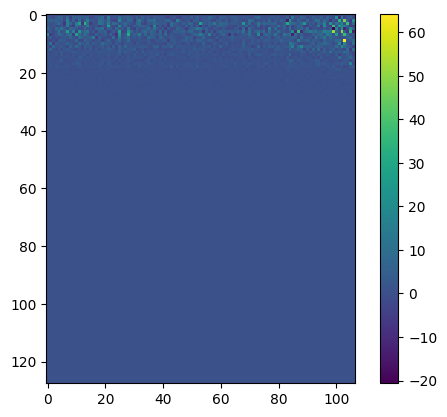

In [35]:
# show first layer in a 2D plot
# with information about the colors
plt.imshow(first_layer.detach().cpu().numpy(), cmap='viridis', interpolation='nearest')
plt.colorbar()

(-1.0, 1.0)

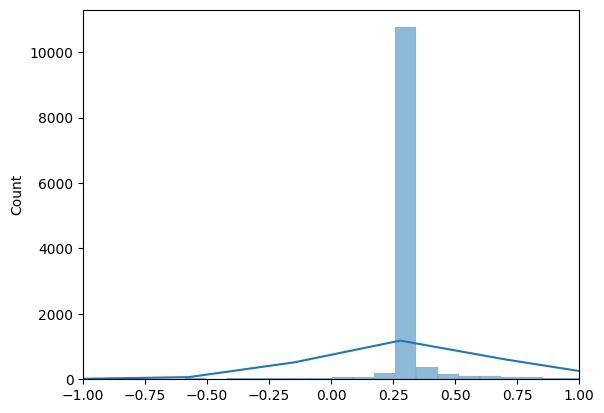

In [37]:
# show histogram of values in embeddings
# but only the values between -1 and 1
sns.histplot(first_layer.detach().cpu().numpy().flatten(), bins=1000, kde=True)
plt.xlim(-1, 1)
